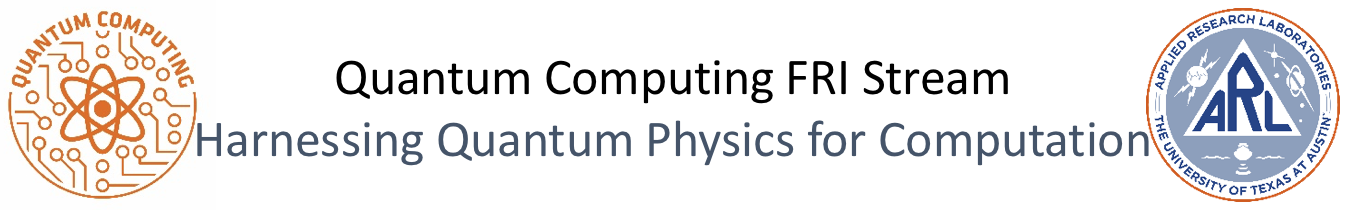

#### Most Recent Lesson: Lesson05 - Grover's Algorithm

### Installations and Imports

In [1]:
#In case you don't have qiskit, install it now
%pip install qiskit --quiet
%pip install qiskit-aer --quiet
#Installing/upgrading pylatexenc seems to have fixed my mpl issue
#If you try this and it doesn't work, try also restarting the runtime/kernel
%pip install pylatexenc --quiet

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
#Let's go ahead and import all this stuff too
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import Aer
from qiskit.quantum_info import Statevector
import numpy as np
from qiskit.visualization import plot_histogram, plot_state_qsphere, plot_bloch_multivector, plot_bloch_vector

# <font color=green>Homework</font>


$\text{- Use Qiskit to implement an oracle }\mathbf{U}_{f} \text{ with an arbitrary }n\text{-bit planted solution }a \text{ (}a\text{ should be }\textbf{randomly}\text{ chosen at run time).}$

$\text{- Use }2^{n}=N\gt 4 \text{ and use multicontrolled }\textbf{X}\text{ gate in concert with }\textbf{X}\text{ gates in order to construct your oracle }\mathbf{U}_{f}$

$\text{- Implement Grover's algorithm to solve for }a.$

$\text{- Analyze your results and verify that your solution is correct.}$

If you prefer not to use your implementation of the recursive Toffoli gate, you may use Qiskit's multi-controlled __X__ gate, demonstrated below.

In [3]:
# Example of multi-controlled X gate
qc = QuantumCircuit(5)
qc.mcx([0,1,2,4],[3],mode="noancilla")
qc.draw()

q_0: ──■──
       │  
q_1: ──■──
       │  
q_2: ──■──
     ┌─┴─┐
q_3: ┤ X ├
     └─┬─┘
q_4: ──■──

### Remember the Steps to Grover's Algorithm

$1) \text{ Start with an }n\text{-qubit input and 1-qubit output register.}$
$$|0\dots 0\rangle|0\rangle$$

$2) \text{ Apply a NOT and then Hadamard to the output register.}$

$3) \text{ Apply Hadamards to the input register.}$

$4) \text{ Do the following }R\text{ times, where }R=\lfloor\pi\sqrt{N}/4\rfloor$

$\quad \text{a) Apply the oracle }\mathbf{U}_{f}$

$\quad \text{b) Apply }\mathbf{W}=-\prod_{i=1}^{n}\mathbf{H}_{i}\mathbf{X}_{i} \;\; \mathbf{C}^{\mathbf{Z}}_{n\dots 2 1}\;\prod_{j=1}^{n}\mathbf{X}_{j}\mathbf{H}_{j}\text{ to the input register}$

$5) \text{ Apply a Hadamard and then NOT gate to the output register.}$

$6) \text{ Measure the input register; the result is most likely }a.$

In [4]:
import numpy as np
# make a random bitstring of size n
def random_bitstring(n):
    return ''.join([np.random.choice(['0','1']) for i in range(n)])


In [5]:
def functionMaker(n):
    bitstring = random_bitstring(n)
    
    U = QuantumCircuit(n+1)
    # multicontrol X gate with the bitstring as control
    # qubits = []
    # for i in range(n):
    #     if(bitstring[i] == '1' and i != n):
    #         qubits.append(n-i)
    # U.mcx(qubits, 0)
    # print("bitstring: ", bitstring)
    for i in range(n):
        if(bitstring[i] == '0'  and i != 0):
            U.x(i)
    U.mcx(U.qubits[1:], U.qubits[0])
    for i in range(n):
        if(bitstring[i] == '0'and i != 0):
            U.x(i)

    return U



In [6]:
N=10
W = QuantumCircuit(N+1)
W.h(W.qubits[1:])
W.x(W.qubits[1:])

W.h(W.qubits[0])
W.mcx(W.qubits[1:], W.qubits[0])
W.h(W.qubits[0])

W.x(W.qubits[1:])
W.h(W.qubits[1:])

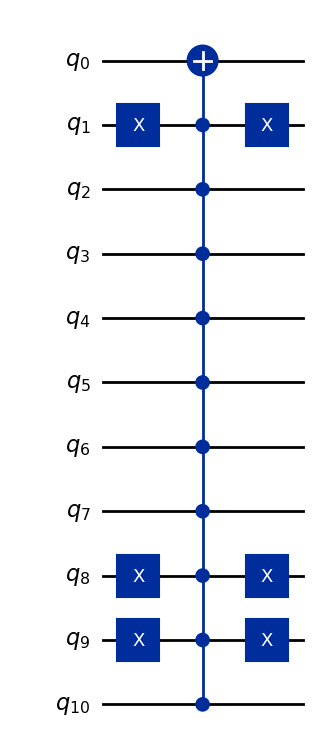

In [7]:
M = 1
qc = QuantumCircuit(N+1,N)
R = int(np.floor(np.pi*np.sqrt(2**N/M)/4))
U = functionMaker(N)
U.draw('mpl')


25


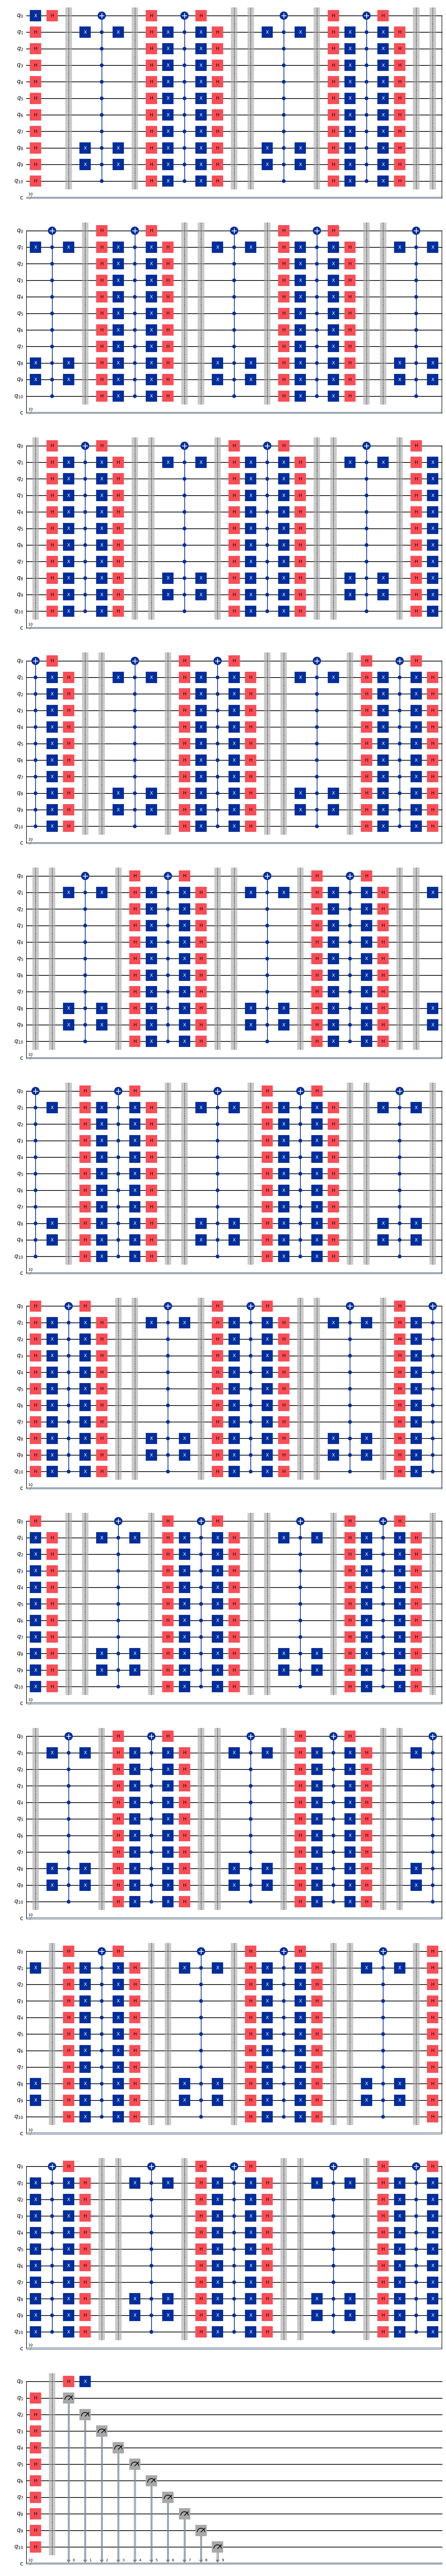

In [8]:
print(R)
qc.x(qc.qubits[0])
qc.h(qc.qubits)

for i in range(R):
    qc.barrier()
    qc.compose(U,qubits=range(N+1),inplace=True)
    qc.barrier()
    qc.compose(W,qubits=range(N+1),inplace=True)
    qc.barrier()
qc.h(qc.qubits[0])
qc.x(qc.qubits[0])
qc.measure(qc.qubits[1:],qc.clbits)
qc.draw('mpl')

{'1101001010': 1, '1011111101': 1, '1110100101': 1, '0101100100': 1, '0110111110': 1, '1110011110': 1, '0000100100': 1, '1011111110': 1, '1111011111': 1, '0111110000': 1, '0010101110': 1, '0100001000': 1, '1110100110': 1, '0011101000': 1, '0101000110': 1, '1110101000': 1, '0000111010': 1, '1111000111': 1, '1000001010': 1, '1011010000': 1, '1011101011': 3, '0011100001': 1, '0010011100': 1, '1101000010': 1, '0000101011': 1, '0010110000': 1, '1110011011': 1, '0100111001': 1, '0111100110': 1, '0000111000': 1, '1011100110': 1, '1110001000': 1, '1010110011': 1, '0100000100': 1, '1111001110': 1, '0101000001': 1, '1101000011': 1, '1100011101': 1, '0100000111': 3, '1100101011': 1, '0100011101': 1, '1110000110': 1, '0100011000': 1, '0110011100': 2, '1010101011': 1, '1100000100': 1, '1101011010': 1, '0000111001': 1, '0110100011': 1, '0101101000': 2, '1011110011': 1, '1101110100': 2, '1110111111': 1, '0100001101': 1, '0110101000': 1, '1001000001': 1, '1000000001': 1, '1001001000': 1, '1111101101':

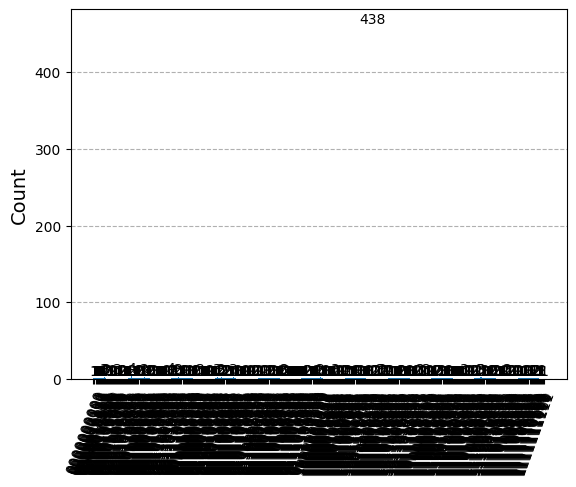

In [9]:
#Simulate your circuit!
backend = Aer.get_backend('qasm_simulator')
counts= backend.run(qc, shots=1024).result().get_counts(qc)
print(counts)
plot_histogram(counts)